In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Succesfull')


Libraries Import Succesfull


In [2]:
# read first file
site_browsing=pd.read_csv('Problem2_Site_BrowingBehavior.csv', delimiter='\t',header=None) 
site_browsing.columns=['Timestamp', 'UserID','Website_section_visited']
site_browsing.head()


,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [3]:
print(site_browsing.shape)
site_browsing.info()


(5535924, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 126.7+ MB


In [4]:
site_browsing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 126.7+ MB


In [5]:
# converting date time format
site_browsing['Timestamp']=pd.to_datetime(site_browsing['Timestamp'])
#site_browsing['UserID'] = site_browsing['UserID'] .astype(np.uint8)
site_browsing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Timestamp                datetime64[ns]
 1   UserID                   int64         
 2   Website_section_visited  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 126.7+ MB


In [6]:
# reading second file
final_conversion=pd.read_csv('Problem2_FInalConversions.csv',sep="\t", header = None)
final_conversion.columns=['Timestamp', 'UserID', 'Products_Purchased', 'Cart_Value']
final_conversion.head()


,Timestamp,UserID,Products_Purchased,Cart_Value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [7]:
print(final_conversion.shape)
final_conversion.info()


(79795, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           79795 non-null  object 
 1   UserID              79795 non-null  int64  
 2   Products_Purchased  79795 non-null  object 
 3   Cart_Value          79795 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [8]:
#Converting to datatime format
final_conversion['Timestamp']=pd.to_datetime(final_conversion['Timestamp'])
#final_conversion['UserID'] = final_conversion['UserID'] .astype(np.uint8)
final_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           79795 non-null  datetime64[ns]
 1   UserID              79795 non-null  int64         
 2   Products_Purchased  79795 non-null  object        
 3   Cart_Value          79795 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [9]:
#Merging two Dataframes
df_final=pd.merge(final_conversion,site_browsing,on=['UserID'],how='inner',left_index=True,right_index=True)
df_final.shape


(79795, 6)

In [10]:
print(df_final.info())
df_final.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79795 entries, 0 to 79794
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp_x              79795 non-null  datetime64[ns]
 1   UserID                   79795 non-null  int64         
 2   Products_Purchased       79795 non-null  object        
 3   Cart_Value               79795 non-null  float64       
 4   Timestamp_y              79795 non-null  datetime64[ns]
 5   Website_section_visited  79795 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ MB
None


,Timestamp_x,UserID,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
79790,2017-07-26 23:09:08.202,9174973170462435039,K45766,89.96,2017-07-26 00:39:14.899,home
79791,2017-07-26 23:44:19.505,9179943977593655876,V34738,24.66,2017-07-26 00:39:14.909,content
79792,2017-07-26 23:53:15.661,9179943977593655876,H210000,21.64,2017-07-26 00:39:14.944,home
79793,2017-07-26 23:13:02.550,9211905364441411643,A209343,73.00,2017-07-26 00:39:15.161,product
79794,2017-07-26 23:21:05.221,9221827579306644828,V34417,33.50,2017-07-26 00:39:15.223,product


In [11]:
df_final.UserID.value_counts()

   

0                      20197
6999042003656970156       31
559346213618742389        22
9050159186422090402       20
1536590739380574003       20
                       ...  
8721108960309386090        1
6550192714371123312        1
8875479531064627858        1
6605416823766117807        1
1731797111331025079        1
Name: UserID, Length: 41009, dtype: int64

In [12]:

df=df_final.groupby(['UserID'],sort=True)
print(df.head())


                  Timestamp_x               UserID Products_Purchased  \
0     2017-07-26 00:00:10.465                    0            A293532   
1     2017-07-26 00:00:12.301                    0            H209597   
2     2017-07-26 00:00:12.388                    0            H211370   
3     2017-07-26 00:00:14.389                    0            A282331   
4     2017-07-26 00:00:16.837                    0            H211410   
...                       ...                  ...                ...   
79790 2017-07-26 23:09:08.202  9174973170462435039             K45766   
79791 2017-07-26 23:44:19.505  9179943977593655876             V34738   
79792 2017-07-26 23:53:15.661  9179943977593655876            H210000   
79793 2017-07-26 23:13:02.550  9211905364441411643            A209343   
79794 2017-07-26 23:21:05.221  9221827579306644828             V34417   

       Cart_Value             Timestamp_y   Website_section_visited  
0           52.14 2017-07-26 00:01:40.965            

In [13]:
print(df_final.groupby('UserID')['Cart_Value'].sum(),
      df_final.groupby('UserID')['Products_Purchased'].count())



UserID
0                      1375101.66
2941287703                  75.34
71023925710020              89.96
394529638495081             94.34
430191686443660             84.70
                          ...    
9222344977727669611         89.96
9222827786235385211        292.00
9222849861047010228         64.40
9223093682582171386        144.96
9223308018930726010         54.00
Name: Cart_Value, Length: 41009, dtype: float64 UserID
0                      20197
2941287703                 1
71023925710020             1
394529638495081            1
430191686443660            2
                       ...  
9222344977727669611        1
9222827786235385211        1
9222849861047010228        1
9223093682582171386        1
9223308018930726010        1
Name: Products_Purchased, Length: 41009, dtype: int64


In [14]:

#dt=date()
purchasedt=df_final.groupby('UserID')['Timestamp_x'].max()
#purchasedt
sitesurveydt=df_final.groupby('UserID')['Timestamp_y'].min()
datedif=(purchasedt-sitesurveydt)
datedif.head()
datedif.dt.total_seconds()/60


UserID
0                      1439.969783
2941287703             1206.404500
71023925710020          687.885650
394529638495081         616.336717
430191686443660         999.107750
                          ...     
9222344977727669611     977.800667
9222827786235385211    1029.206933
9222849861047010228     131.492550
9223093682582171386    1163.234817
9223308018930726010      77.346233
Length: 41009, dtype: float64

In [17]:
site_browsing.groupby('UserID')['Timestamp'].count()

UserID
0                      1407879
2                           15
5                            2
342391                       7
420372                       2
                        ...   
9223331925947099393          1
9223332159306941752          5
9223343967635174542          8
9223348075878229938          5
9223367577450368994          1
Name: Timestamp, Length: 516932, dtype: int64

In [18]:
data=pd.DataFrame()
data['Total_Cart_value']=df_final.groupby('UserID')['Cart_Value'].sum()

data['Total_Product_purchased']=df_final.groupby('UserID')['Products_Purchased'].count()
data['No_of_times_visited']=site_browsing.groupby('UserID')['Timestamp'].count()

purchasedt=df_final.groupby('UserID')['Timestamp_x'].max()
#purchasedt
sitesurveydt=df_final.groupby('UserID')['Timestamp_y'].min()
datedif=(purchasedt-sitesurveydt)
#datedif.head()
data['Time_Spent']=datedif.dt.total_seconds()/60
data.head()


,Total_Cart_value,Total_Product_purchased,No_of_times_visited,Time_Spent
UserID,,,,
0,1375101.66,20197,1407879.0,1439.969783
2941287703,75.34,1,3.0,1206.404500
71023925710020,89.96,1,2.0,687.885650
394529638495081,94.34,1,3.0,616.336717
430191686443660,84.70,2,13.0,999.107750


In [ ]:
data = data.reset_index()
data=data.drop(['UserID'],axis=1)
data.head()

In [ ]:
print(data.shape)
print(data.info())
print(data.describe())

In [5]:
def df_summary(df):
    df_U=df.nunique()
    df_M=df.isnull().sum()
    df_I=df.dtypes
    df_U=df_U.to_frame().reset_index()
    df_M=df_M.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()
    df_U = df_U.rename(columns= {0: 'Unique Data'})   #renaming the 0 column tp Unique data
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    #merge on index all the 3 dataframe, merge two first then third
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return output

In [21]:
df_summary(data)

,index,Missing Data,Unique Data,Data Types
0,Total_Cart_value,0,9299,float64
1,Total_Product_purchased,0,22,int64
2,No_of_times_visited,155,271,float64
3,Time_Spent,0,40990,float64


% of null values in  No of times Visited =0.38


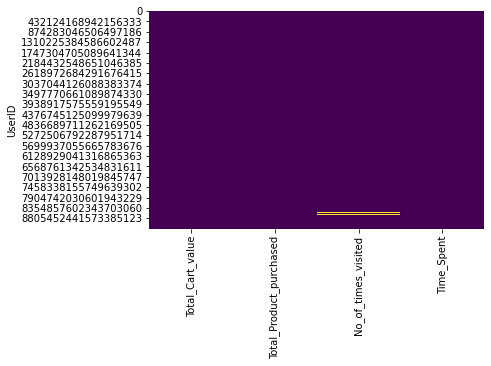

In [22]:
#no of times Visited contaions null values
#site_browsing.info()
print('% of null values in  No of times Visited ={0:.2f}'.format(data['No_of_times_visited'].isnull().sum()/len(data)*100))
import seaborn as sn
import matplotlib.pyplot as pt
sn.heatmap(data.isnull(),cbar=False,cmap='viridis')
pt.show()


In [23]:
#Distirution of data in field No_of_times_Visited
#sn.histplot(data.No_of_times_visited.dropna(),kde=True) #Kernal distribytion 

In [24]:
data.No_of_times_visited.describe()

count    4.085400e+04
mean     5.521653e+01
std      6.965376e+03
min      1.000000e+00
25%      7.000000e+00
50%      1.300000e+01
75%      2.500000e+01
max      1.407879e+06
Name: No_of_times_visited, dtype: float64

In [25]:
data.No_of_times_visited.mode()
data.No_of_times_visited.fillna(1.0,inplace=True)

In [26]:
print(data.shape)
print(data.info())
print(data.describe())
df_summary(data)

(41009, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41009 entries, 0 to 9223308018930726010
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Total_Cart_value         41009 non-null  float64
 1   Total_Product_purchased  41009 non-null  int64  
 2   No_of_times_visited      41009 non-null  float64
 3   Time_Spent               41009 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.6 MB
None
       Total_Cart_value  Total_Product_purchased  No_of_times_visited  \
count      4.100900e+04             41009.000000         4.100900e+04   
mean       1.357895e+02                 1.945792         5.501161e+01   
std        6.792351e+03                99.733169         6.952201e+03   
min        8.400000e+00                 1.000000         1.000000e+00   
25%        4.114000e+01                 1.000000         6.000000e+00   
50%        6.550000e+01                 1.000000  

,index,Missing Data,Unique Data,Data Types
0,Total_Cart_value,0,9299,float64
1,Total_Product_purchased,0,22,int64
2,No_of_times_visited,0,271,float64
3,Time_Spent,0,40990,float64


In [27]:
data['BuyProbability']=(data['Total_Product_purchased']/data['No_of_times_visited'])
data.head()

,Total_Cart_value,Total_Product_purchased,No_of_times_visited,Time_Spent,BuyProbability
UserID,,,,,
0,1375101.66,20197,1407879.0,1439.969783,0.014346
2941287703,75.34,1,3.0,1206.404500,0.333333
71023925710020,89.96,1,2.0,687.885650,0.500000
394529638495081,94.34,1,3.0,616.336717,0.333333
430191686443660,84.70,2,13.0,999.107750,0.153846


In [28]:
data['Target']=data['BuyProbability']*data['Total_Cart_value']

In [29]:
data.to_csv('Final_Data.csv')

In [30]:
print(data.head())

                 Total_Cart_value  Total_Product_purchased  \
UserID                                                       
0                      1375101.66                    20197   
2941287703                  75.34                        1   
71023925710020              89.96                        1   
394529638495081             94.34                        1   
430191686443660             84.70                        2   

                 No_of_times_visited   Time_Spent  BuyProbability  \
UserID                                                              
0                          1407879.0  1439.969783        0.014346   
2941287703                       3.0  1206.404500        0.333333   
71023925710020                   2.0   687.885650        0.500000   
394529638495081                  3.0   616.336717        0.333333   
430191686443660                 13.0   999.107750        0.153846   

                       Target  
UserID                         
0                

In [31]:
print(data.shape)
print(data.info())
print(data.describe())
df_summary(data)



(41009, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41009 entries, 0 to 9223308018930726010
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Total_Cart_value         41009 non-null  float64
 1   Total_Product_purchased  41009 non-null  int64  
 2   No_of_times_visited      41009 non-null  float64
 3   Time_Spent               41009 non-null  float64
 4   BuyProbability           41009 non-null  float64
 5   Target                   41009 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 2.2 MB
None
       Total_Cart_value  Total_Product_purchased  No_of_times_visited  \
count      4.100900e+04             41009.000000         4.100900e+04   
mean       1.357895e+02                 1.945792         5.501161e+01   
std        6.792351e+03                99.733169         6.952201e+03   
min        8.400000e+00                 1.000000         1.000000e+00   
25%        4.11

,index,Missing Data,Unique Data,Data Types
0,Total_Cart_value,0,9299,float64
1,Total_Product_purchased,0,22,int64
2,No_of_times_visited,0,271,float64
3,Time_Spent,0,40990,float64
4,BuyProbability,0,729,float64
5,Target,0,21070,float64


In [32]:
# Data Visulisation
#sns.pairplot(data)
#plt.show()


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols=['Total_Cart_value','Total_Product_purchased','No_of_times_visited','Time_Spent','BuyProbability','Target']
data[cols] = scaler.fit_transform(data[cols])

In [34]:
data.head()

,Total_Cart_value,Total_Product_purchased,No_of_times_visited,Time_Spent,BuyProbability,Target
UserID,,,,,,
0,1.000000,1.00000,1.000000e+00,1.000000,0.002161,1.000000
2941287703,0.000049,0.00000,1.420578e-06,0.839766,0.055338,0.001272
71023925710020,0.000059,0.00000,7.102888e-07,0.484044,0.083122,0.002279
394529638495081,0.000062,0.00000,1.420578e-06,0.434959,0.055338,0.001593
430191686443660,0.000055,0.00005,8.523466e-06,0.697553,0.025416,0.000659


In [35]:
# spliting data into train/test data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,Total_Cart_value,Total_Product_purchased,No_of_times_visited,Time_Spent,BuyProbability,Target
UserID,,,,,,
7875129005403877330,0.000044,0.00000,0.000004,0.872462,0.027554,0.000584
5813914089058294418,0.000001,0.00000,0.000005,0.156364,0.020608,0.000062
5962835550562553448,0.000117,0.00000,0.000010,0.650628,0.010883,0.000569
3476445029083182143,0.000069,0.00005,0.000013,0.726420,0.017317,0.000548
2766452189529119335,0.000071,0.00000,0.000031,0.032013,0.003558,0.000121


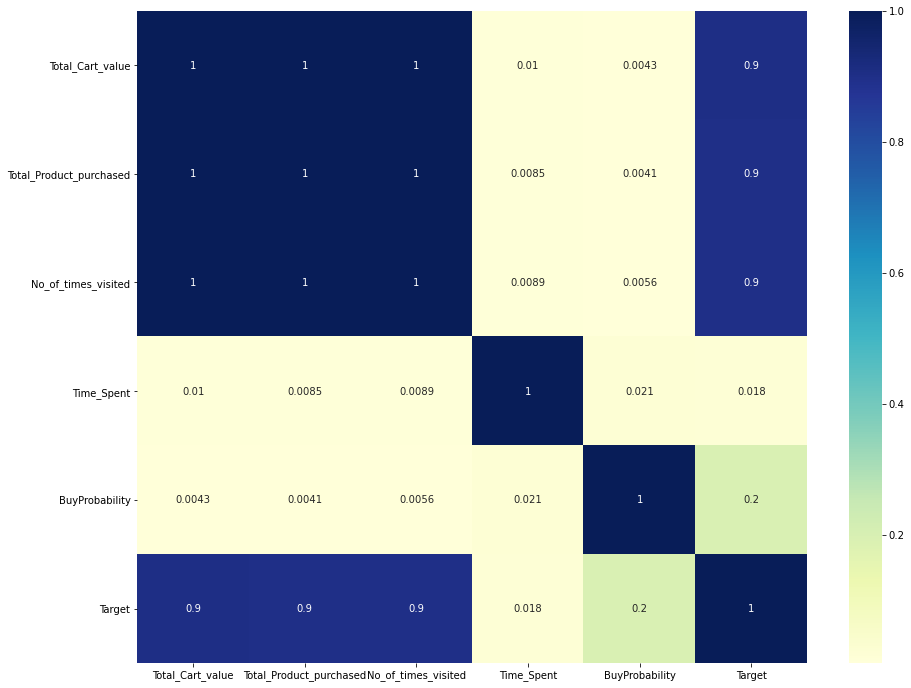

In [36]:
#corelation of features
plt.figure(figsize = (15, 12))
sns.heatmap(df_train.corr().abs(), annot = True, cmap="YlGnBu")
plt.show()

In [37]:
#Target feature is highly +ve corelated with Total cart value,Total product purchased and No of times visited

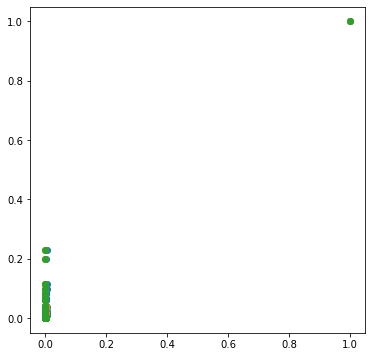

In [38]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.Total_Cart_value, df_train.Target)
plt.scatter(df_train.Total_Product_purchased, df_train.Target)
plt.scatter(df_train.No_of_times_visited, df_train.Target)

plt.show()

# Linear Regression

In [39]:
# Drop the target feature  (price)
y_train = df_train.pop('Target')
X_train = df_train
X_train.head()

,Total_Cart_value,Total_Product_purchased,No_of_times_visited,Time_Spent,BuyProbability
UserID,,,,,
7875129005403877330,0.000044,0.00000,0.000004,0.872462,0.027554
5813914089058294418,0.000001,0.00000,0.000005,0.156364,0.020608
5962835550562553448,0.000117,0.00000,0.000010,0.650628,0.010883
3476445029083182143,0.000069,0.00005,0.000013,0.726420,0.017317
2766452189529119335,0.000071,0.00000,0.000031,0.032013,0.003558


In [40]:
# Build a linear model
# features having corelation value more than 0.8
X_train_lm1 = X_train[['Total_Cart_value','Total_Product_purchased','No_of_times_visited']]

import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr = sm.OLS(y_train, X_train_lm1).fit()

print(lr.params)
print(lr.summary())


const                       0.000122
Total_Cart_value           11.319525
Total_Product_purchased     5.164070
No_of_times_visited       -15.483859
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 6.449e+04
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:59:18   Log-Likelihood:             1.3294e+05
No. Observations:               28706   AIC:                        -2.659e+05
Df Residuals:                   28702   BIC:                        -2.658e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err  

In [41]:
# Build a linear model
# All features 
#X_train_lm1 = X_train[['Total_Cart_value','Total_Product_purchased','No_of_times_visited']]

import statsmodels.api as sm
X_train_lm2 = sm.add_constant(X_train)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

print(lr2.params)
print(lr2.summary())


const                      -0.000811
Total_Cart_value           11.290344
Total_Product_purchased     0.269231
No_of_times_visited       -10.558645
Time_Spent                 -0.000114
BuyProbability              0.041629
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.462e+04
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:59:18   Log-Likelihood:             1.3734e+05
No. Observations:               28706   AIC:                        -2.747e+05
Df Residuals:                   28700   BIC:                        -2.746e+05
Df Model:                           5                                         
Covariance Type:            nonrobust               

In [42]:
# R Square and Adjusted R2 both increased and Durbin Watson in also around 2 so we take lr2 as final model

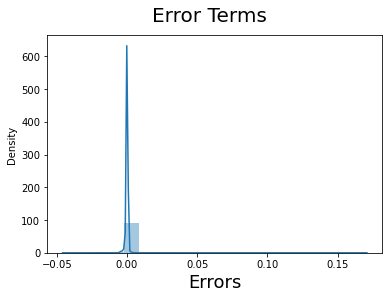

In [43]:
y_train_price = lr2.predict(X_train_lm2)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [44]:
#MAkng predictions

In [45]:
X_test = sm.add_constant(df_test)

In [46]:
y_test =X_test.pop('Target')####
X_test =X_test
print(y_test)
print(X_test.info)

UserID
5561924997883628788    0.000218
8720550756461128407    0.000261
7826643401988677359    0.000206
2707379072536537785    0.000527
7237600298871970825    0.000510
                         ...   
6084139948065130131    0.000227
8940183383693357550    0.001069
3482427713814823025    0.000252
5368519689184953369    0.000429
2958709906513957604    0.000650
Name: Target, Length: 12303, dtype: float64
<bound method DataFrame.info of                      const  Total_Cart_value  Total_Product_purchased  \
UserID                                                                  
5561924997883628788    1.0          0.000051                      0.0   
8720550756461128407    1.0          0.000028                      0.0   
7826643401988677359    1.0          0.000083                      0.0   
2707379072536537785    1.0          0.000032                      0.0   
7237600298871970825    1.0          0.000456                      0.0   
...                    ...               ...          

In [47]:
# Making predictions using second model
y_pred_m2 = lr2.predict(X_test)
y_pred_m2

UserID
5561924997883628788   -0.000072
8720550756461128407    0.000146
7826643401988677359    0.000101
2707379072536537785    0.000885
7237600298871970825    0.003967
                         ...   
6084139948065130131   -0.000055
8940183383693357550    0.002390
3482427713814823025    0.000142
5368519689184953369    0.001557
2958709906513957604    0.000713
Length: 12303, dtype: float64

In [48]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_m2})
df

,Real Values,Predicted Values
UserID,,
5561924997883628788,0.000218,-0.000072
8720550756461128407,0.000261,0.000146
7826643401988677359,0.000206,0.000101
2707379072536537785,0.000527,0.000885
7237600298871970825,0.000510,0.003967
...,...,...
6084139948065130131,0.000227,-0.000055
8940183383693357550,0.001069,0.002390
3482427713814823025,0.000252,0.000142


Text(0, 0.5, 'y_pred')

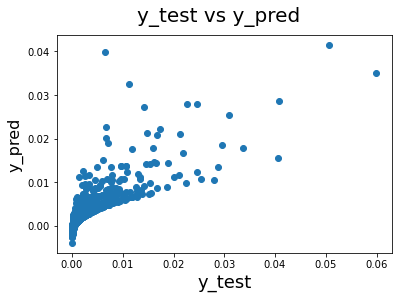

In [49]:
# Plotting y_test and y_pred to understand the spread
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Text(0, 0.5, 'Residuals')

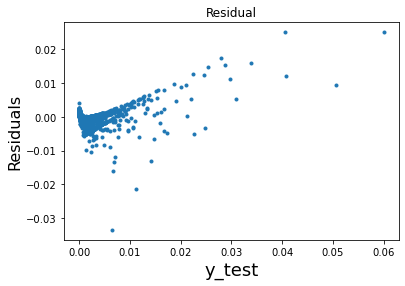

In [50]:
# Plotting y_test and residual to understand the spread

fig = plt.figure()
plt.plot(y_test , y_test-y_pred_m2, '.')
#fig.suptitle('Residuals', fontsize = 20)              # Plot heading 
plt.title("Residual")
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('Residuals', fontsize = 16)

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("\n Mean squared error =:", mean_squared_error(y_pred_m2,y_test))
print("\nRoot Mean squared error =:",np.sqrt(mean_squared_error(y_pred_m2,y_test)))
print("\n Mean absolute error =:", mean_absolute_error(y_pred_m2,y_test))
print("\n R2 Score =:", r2_score(y_pred_m2,y_test))


 Mean squared error =: 1.1379469668045397e-06

Root Mean squared error =: 0.0010667459710749039

 Mean absolute error =: 0.0005140604131025077

 R2 Score =: 0.6601251417957328


-Target=-0.000811+Total_Cart_value*11.290344+Total_Product_purchased*0.269231+
No_of_times_visited*-10.558645+Time_Spent*-0.000114+BuyProbability*0.041629

# Decision Tree

In [7]:
Ddata=pd.read_csv('Final_Data.csv')
Ddata.shape
Ddata.head() #Ddata.info()

,UserID,Total_Cart_value,Total_Product_purchased,No_of_times_visited,Time_Spent,BuyProbability,Target
0,0,1375101.66,20197,1407879.0,1439.969783,0.014346,19726.786341
1,2941287703,75.34,1,3.0,1206.404500,0.333333,25.113333
2,71023925710020,89.96,1,2.0,687.885650,0.500000,44.980000
3,394529638495081,94.34,1,3.0,616.336717,0.333333,31.446667
4,430191686443660,84.70,2,13.0,999.107750,0.153846,13.030769


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols=['Total_Cart_value','Total_Product_purchased','No_of_times_visited','Time_Spent','BuyProbability','Target']
#scaler.fit(X_train[cols])
Ddata[cols] = scaler.fit_transform(Ddata[cols])


In [9]:
Ddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41009 entries, 0 to 41008
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UserID                   41009 non-null  int64  
 1   Total_Cart_value         41009 non-null  float64
 2   Total_Product_purchased  41009 non-null  float64
 3   No_of_times_visited      41009 non-null  float64
 4   Time_Spent               41009 non-null  float64
 5   BuyProbability           41009 non-null  float64
 6   Target                   41009 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.2 MB


In [10]:

y=Ddata['Target']
X=Ddata.drop(['Target'],axis=1)
print(X.head())

            UserID  Total_Cart_value  Total_Product_purchased  \
0                0        202.431046               202.493319   
1       2941287703         -0.008900                -0.009483   
2   71023925710020         -0.006747                -0.009483   
3  394529638495081         -0.006102                -0.009483   
4  430191686443660         -0.007522                 0.000544   

   No_of_times_visited  Time_Spent  BuyProbability  
0           202.502947    1.528300       -0.765900  
1            -0.007481    1.044511        1.036097  
2            -0.007625   -0.029508        1.977616  
3            -0.007481   -0.177709        1.036097  
4            -0.006043    0.615133        0.022154  


In [11]:
#Split the dataset into training and testing part
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print(X_train.info())
print(X_train.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28706 entries, 12762 to 27098
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UserID                   28706 non-null  int64  
 1   Total_Cart_value         28706 non-null  float64
 2   Total_Product_purchased  28706 non-null  float64
 3   No_of_times_visited      28706 non-null  float64
 4   Time_Spent               28706 non-null  float64
 5   BuyProbability           28706 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.5 MB
None
                    UserID  Total_Cart_value  Total_Product_purchased  \
12762  2843786458931322138         -0.014144                -0.009483   
5459   1210197778340283384         -0.003732                -0.009483   
27890  6255857515698668945          0.002681                -0.009483   
3018    673879138685972674         -0.015808                -0.009483   
27523  6164067352813114871         -

In [12]:
X_train.head()

,UserID,Total_Cart_value,Total_Product_purchased,No_of_times_visited,Time_Spent,BuyProbability
12762,2843786458931322138,-0.014144,-0.009483,-0.006618,0.044367,-0.219261
5459,1210197778340283384,-0.003732,-0.009483,-0.005468,-0.865109,-0.514640
27890,6255857515698668945,0.002681,-0.009483,-0.007481,0.794942,1.036097
3018,673879138685972674,-0.015808,-0.009483,-0.007769,-0.699033,4.802172
27523,6164067352813114871,-0.012904,0.000544,-0.005899,0.468416,-0.039925


In [58]:
#Model fitting on trainig data
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()   #creating decision tree object 1 with default parameters gini index

#Train the model using the training sets
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
y_pred=dt_model.predict(X_test)

In [60]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
8375,-0.087312,-0.084936
30439,-0.129267,-0.129200
31208,-0.131540,-0.131540
14113,-0.005044,-0.006420
36261,-0.136770,-0.136763
...,...,...
4657,-0.135512,-0.135626
39579,-0.118716,-0.118419
40293,-0.086396,-0.086396
16880,-0.140417,-0.140537


In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("\n Mean squared error =:", mean_squared_error(y_pred,y_test))
print("\nRoot Mean squared error =:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("\n Mean absolute error =:", mean_absolute_error(y_pred,y_test))
print("\n R2 Score =:", r2_score(y_pred,y_test))



 Mean squared error =: 0.005923889449659827

Root Mean squared error =: 0.07696680745399166

 Mean absolute error =: 0.005806735010118885

 R2 Score =: 0.9361863048249631


In [62]:
Mean squared error =: 1.1379469668045397e-06

Root Mean squared error =: 0.0010667459710749039

 Mean absolute error =: 0.0005140604131025077

 R2 Score =: 0.6601251417957328



SyntaxError: invalid syntax (<ipython-input-62-72b97785eef4>, line 1)

# KNN Model

In [14]:
X_train.head()

,UserID,Total_Cart_value,Total_Product_purchased,No_of_times_visited,Time_Spent,BuyProbability
12762,2843786458931322138,-0.014144,-0.009483,-0.006618,0.044367,-0.219261
5459,1210197778340283384,-0.003732,-0.009483,-0.005468,-0.865109,-0.514640
27890,6255857515698668945,0.002681,-0.009483,-0.007481,0.794942,1.036097
3018,673879138685972674,-0.015808,-0.009483,-0.007769,-0.699033,4.802172
27523,6164067352813114871,-0.012904,0.000544,-0.005899,0.468416,-0.039925


In [17]:
# Fit the knn classifier
from sklearn.neighbors import KNeighborsRegressor
Kmodel =KNeighborsRegressor()
Kmodel.fit(X_train, y_train)

KNeighborsRegressor()

In [18]:
# Use the classifier to make prediction on test data
y_pred = Kmodel.predict(X_test)

In [19]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
8375,-0.087312,-0.068560
30439,-0.129267,-0.002611
31208,-0.131540,-0.087906
14113,-0.005044,-0.079294
36261,-0.136770,0.281261
...,...,...
4657,-0.135512,-0.110701
39579,-0.118716,0.007628
40293,-0.086396,-0.033729
16880,-0.140417,-0.034356


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("\n Mean squared error =:", mean_squared_error(y_pred,y_test))
print("\nRoot Mean squared error =:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("\n Mean absolute error =:", mean_absolute_error(y_pred,y_test))
print("\n R2 Score =:", r2_score(y_pred,y_test))


 Mean squared error =: 0.5845489723178853

Root Mean squared error =: 0.7645580241668288

 Mean absolute error =: 0.16579412814593847

 R2 Score =: -0.20374402216944265


In [28]:
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
   
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.7645580241668288
RMSE value for k=  2 is: 0.7645580241668288
RMSE value for k=  3 is: 0.7645580241668288
RMSE value for k=  4 is: 0.7645580241668288
RMSE value for k=  5 is: 0.7645580241668288
RMSE value for k=  6 is: 0.7645580241668288
RMSE value for k=  7 is: 0.7645580241668288
RMSE value for k=  8 is: 0.7645580241668288
RMSE value for k=  9 is: 0.7645580241668288
RMSE value for k=  10 is: 0.7645580241668288
RMSE value for k=  11 is: 0.7645580241668288
RMSE value for k=  12 is: 0.7645580241668288
RMSE value for k=  13 is: 0.7645580241668288
RMSE value for k=  14 is: 0.7645580241668288
RMSE value for k=  15 is: 0.7645580241668288
RMSE value for k=  16 is: 0.7645580241668288
RMSE value for k=  17 is: 0.7645580241668288
RMSE value for k=  18 is: 0.7645580241668288
RMSE value for k=  19 is: 0.7645580241668288
RMSE value for k=  20 is: 0.7645580241668288


<AxesSubplot:>

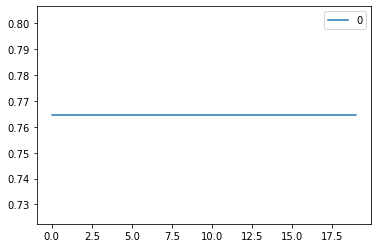

In [29]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [31]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

# SVR

In [33]:
#Support vector Classifier
# capital C is hyperparameter diff frm small c
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
Support_Vector_Regressor=SVR(C=2.0,kernel='rbf')
Support_Vector_Regressor.fit(X_train, y_train)
score=cross_val_score(Support_Vector_Regressor, X_train, y_train, cv=10)
print(score)
#Predict the response for test dataset
y_pred = Support_Vector_Regressor.predict(X_test)

[-0.00323125 -0.00417704 -0.00410692 -0.00094222 -0.00602082 -0.00440461
 -0.00260483 -0.00090749 -0.00124815 -0.00244031]


In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("\n Mean squared error =:", mean_squared_error(y_pred,y_test))
print("\nRoot Mean squared error =:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("\n Mean absolute error =:", mean_absolute_error(y_pred,y_test))
print("\n R2 Score =:", r2_score(y_pred,y_test))


 Mean squared error =: 0.1015483357610209

Root Mean squared error =: 0.31866649613823683

 Mean absolute error =: 0.12031913110900466

 R2 Score =: -261448.86983446006


In [39]:
d={'MSE':[0.005923889449659827,1.1379469668045397e-06,0.5845489723178853,0.1015483357610209],
   'RMSE':[0.07696680745399166, 0.0010667459710749039,0.7645580241668288,0.31866649613823683],
   'MAE':[0.005806735010118885,0.0005140604131025077,0.16579412814593847,0.12031913110900466],
   'R2':[0.9361863048249631,0.6601251417957328,-0.20374402216944265,-261448.86983446006]}
   
result =pd.DataFrame(d,index=['Decision tree','LinerRegression','KNN','SVM'])
result

,MSE,RMSE,MAE,R2
Decision tree,0.005924,0.076967,0.005807,0.936186
LinerRegression,0.000001,0.001067,0.000514,0.660125
KNN,0.584549,0.764558,0.165794,-0.203744
SVM,0.101548,0.318666,0.120319,-261448.869834


-The value of MSE,RMSE and MAE is minimum in Linear Regression
so the Final Model is:
-   Target=-0.000811+Total_Cart_value11.290344+Total_Product_purchased*0.269231+ No_of_times_visited-10.558645+Time_Spent-0.000114+BuyProbability0.041629

